In [1]:
%load_ext autoreload
%autoreload 2

import sys
import os
import time

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

sys.path.append(os.environ['REPO_DIR'] + '/utilities')
from utilities2015 import *
from metadata import *
from data_manager import *

Setting environment for Precision WorkStation
/media/yuncong/BstemAtlasData/CSHL_data_processed/MD585/MD585_prep2_thumbnail/MD585-N16-2015.07.16-20.32.33_MD585_2_0047_prep2_thumbnail.tif


No vtk
No vtkNot using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.


/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_thumbnail/MD589-N16-2015.07.30-17.03.43_MD589_3_0048_prep2_thumbnail.tif
/media/yuncong/BstemAtlasData/CSHL_data_processed/MD590/MD590_prep2_thumbnail/MD590-IHC17-2015.08.10-19.09.09_MD590_2_0050_prep2_thumbnail.tif
/media/yuncong/BstemAtlasData/CSHL_data_processed/MD591/MD591_prep2_thumbnail/MD591-IHC17-2015.08.28-04.23.47_MD591_1_0049_prep2_thumbnail.tif
/media/yuncong/BstemAtlasData/CSHL_data_processed/MD592/MD592_prep2_thumbnail/MD592-N16-2015.08.22-00.50.39_MD592_2_0047_prep2_thumbnail.tif
/media/yuncong/BstemAtlasData/CSHL_data_processed/MD593/MD593_prep2_thumbnail/MD593-N15-2015.08.21-16.53.02_MD593_3_0045_prep2_thumbnail.tif
/media/yuncong/BstemAtlasData/CSHL_data_processed/MD594/MD594_prep2_thumbnail/MD594-IHC16-2015.08.26-16.11.01_MD594_1_0046_prep2_thumbnail.tif
/media/yuncong/BstemAtlasData/CSHL_data_processed/MD595/MD595_prep2_thumbnail/MD595-IHC12-2015.09.15-01.21.39_MD595_2_0035_prep2_thumbnail.tif
/medi

Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.


In [8]:
test_scheme = ('normalize_mu_region_sigma_wholeImage_(-1,5)', 'no-augment')

In [71]:
auroc_all_structures_all_methods = defaultdict(dict)

In [77]:
auroc_all_methods_all_structures = defaultdict(dict)

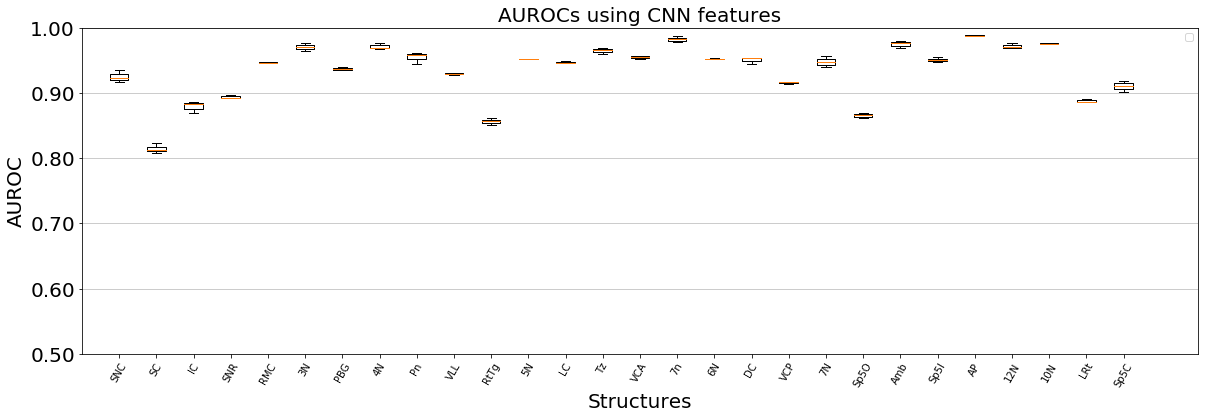

In [78]:
auroc_all_structures = {}

for fn in os.listdir(os.path.join(ROOT_DIR + '/assessment_results_v3')):
#     print fn
    fp = os.path.join(ROOT_DIR + '/assessment_results_v3', fn)
    res = load_pickle(fp)
    
    if 'method' in res and res['method'] == 'cnn' and res['n_sections']['MD594']['7N'] == 99:
        auroc_all_structures[res['structure']] = [res['test_metrics_all_ntrain'][15000][test_scheme][trial]['auroc'] for trial in range(len(res['test_metrics_all_ntrain'][15000][test_scheme]))]
        
plot_by_stack_by_structure({'MD594': auroc_all_structures}, 
                           structures=structures_unsided_sorted_by_rostral_caudal_position,
                              style='boxplot', 
                               ylim=[0.5, 1], yspacing=0.1,
                              title='AUROCs using CNN features',
                              ylabel='AUROC')

for s, scores in auroc_all_structures.iteritems():
    auroc_all_structures_all_methods[s]['cnn'] = scores
    
auroc_all_methods_all_structures['cnn'] = auroc_all_structures

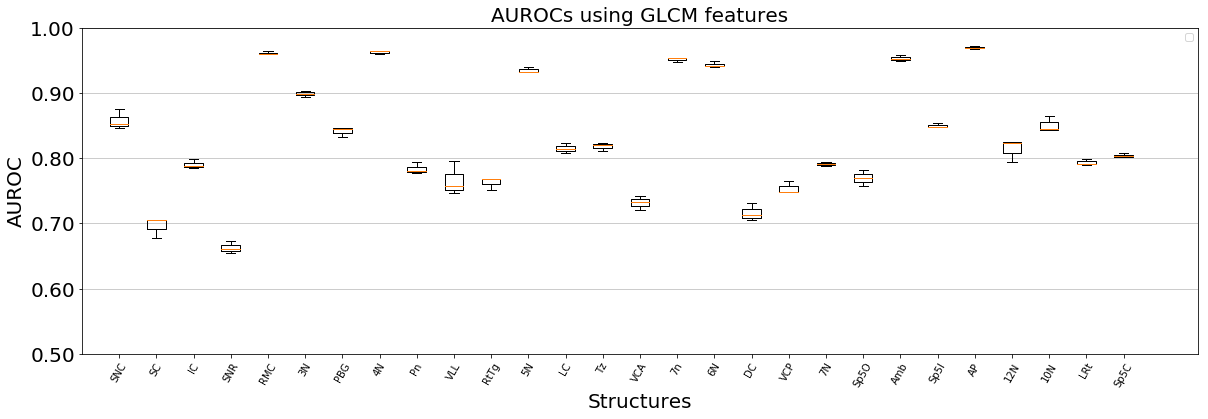

In [79]:
auroc_all_structures = {}

for fn in os.listdir(os.path.join(ROOT_DIR + '/assessment_results_v3')):
#     print fn
    fp = os.path.join(ROOT_DIR + '/assessment_results_v3', fn)
    res = load_pickle(fp)
    
    if 'method' in res and res['method'] == 'glcm':
        auroc_all_structures[res['structure']] = [res['test_metrics_all_ntrain'][15000][test_scheme][trial]['auroc'] for trial in range(len(res['test_metrics_all_ntrain'][15000][test_scheme]))]
        
        
plot_by_stack_by_structure({'MD594': auroc_all_structures}, 
                           structures=structures_unsided_sorted_by_rostral_caudal_position,
                              style='boxplot', 
                               ylim=[0.5, 1], yspacing=0.1,
                              title='AUROCs using GLCM features',
                              ylabel='AUROC')

for s, scores in auroc_all_structures.iteritems():
    auroc_all_structures_all_methods[s]['glcm'] = scores
    
auroc_all_methods_all_structures['glcm'] = auroc_all_structures

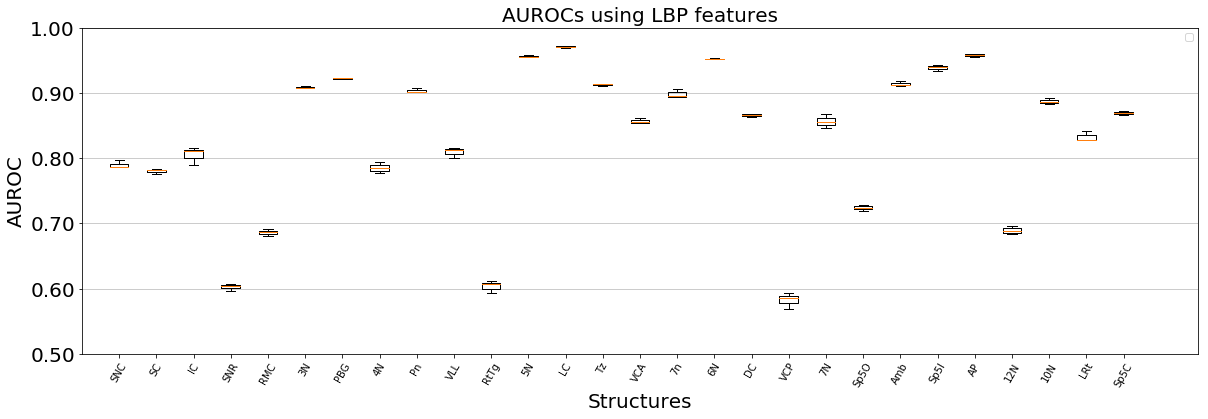

In [80]:
auroc_all_structures = {}

for fn in os.listdir(os.path.join(ROOT_DIR + '/assessment_results_v3')):
#     print fn
    fp = os.path.join(ROOT_DIR + '/assessment_results_v3', fn)
    res = load_pickle(fp)
    
    if 'structure' in res and 'method' not in res:
        auroc_all_structures[res['structure']] = [res['test_metrics_all_ntrain'][15000][test_scheme][trial]['auroc'] for trial in range(len(res['test_metrics_all_ntrain'][15000][test_scheme]))]
        
plot_by_stack_by_structure({'MD594': auroc_all_structures}, 
                           structures=structures_unsided_sorted_by_rostral_caudal_position,
                              style='boxplot', 
                               ylim=[0.5, 1], yspacing=0.1,
                              title='AUROCs using LBP features',
                              ylabel='AUROC')

for s, scores in auroc_all_structures.iteritems():
    auroc_all_structures_all_methods[s]['lbp'] = scores
    
auroc_all_methods_all_structures['lbp'] = auroc_all_structures

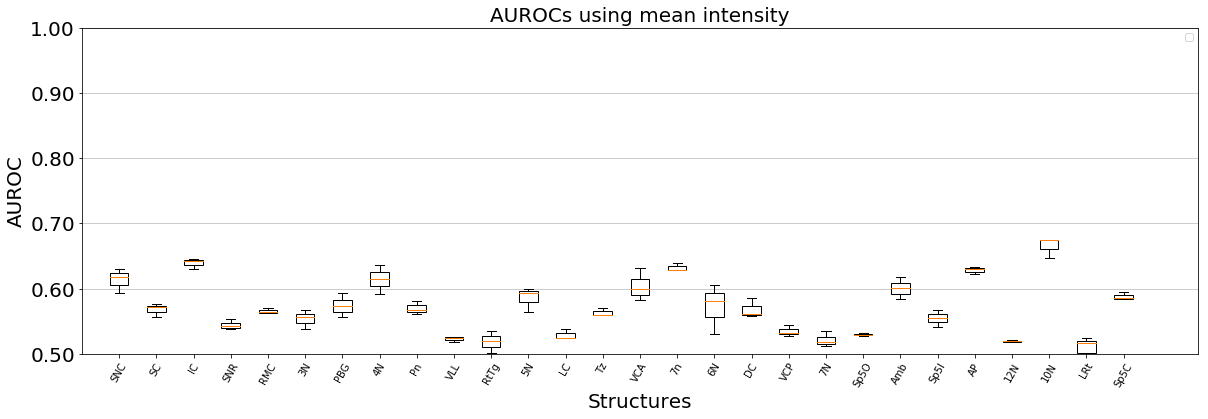

In [179]:
auroc_all_structures = {}

for fn in os.listdir(os.path.join(ROOT_DIR + '/assessment_results_v3')):
#     print fn
    fp = os.path.join(ROOT_DIR + '/assessment_results_v3', fn)
    res = load_pickle(fp)
    
    if 'method' in res and res['method'] == 'mean_intensity':
        auroc_all_structures[res['structure']] = [res['test_metrics_all_ntrain'][15000][test_scheme][trial]['auroc'] for trial in range(len(res['test_metrics_all_ntrain'][15000][test_scheme]))]
        
        
plot_by_stack_by_structure({'MD594': auroc_all_structures}, 
                           structures=structures_unsided_sorted_by_rostral_caudal_position,
                              style='boxplot', 
                               ylim=[0.5, 1], yspacing=0.1,
                              title='AUROCs using mean intensity',
                              ylabel='AUROC', stack_to_color={'MD594':(255,255,255)})

for s, scores in auroc_all_structures.iteritems():
    auroc_all_structures_all_methods[s]['meangrey'] = scores
    
auroc_all_methods_all_structures['meangrey'] = auroc_all_structures

In [174]:
np.median(auroc_all_methods_all_structures['cnn'].values())

0.94764325

In [81]:
auroc_all_structures_all_methods.default_factory = None
auroc_all_methods_all_structures.default_factory = None

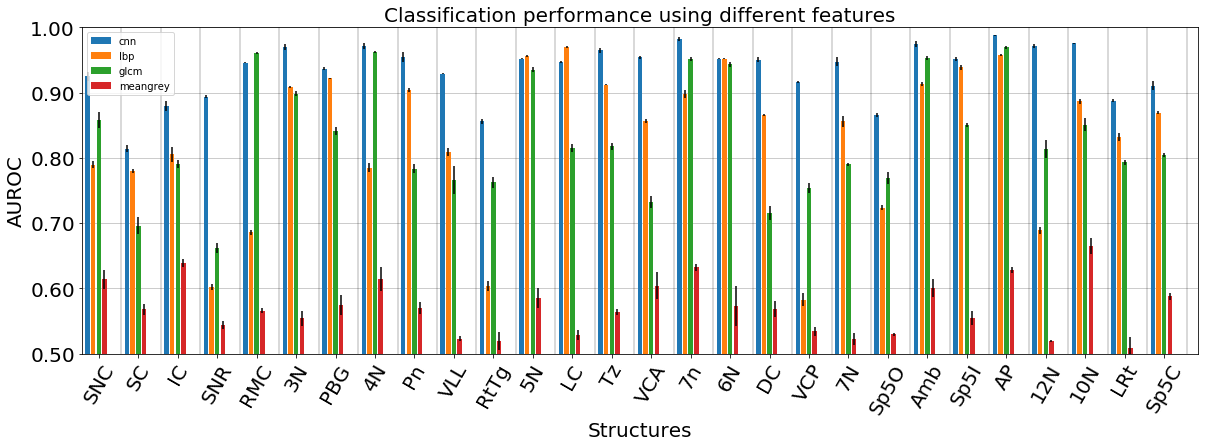

In [181]:
plot_by_method_by_structure(auroc_all_methods_all_structures,
                           structures=structures_unsided_sorted_by_rostral_caudal_position,
                            stacks=['cnn', 'lbp', 'glcm', 'meangrey'],
                              style='boxplot', 
                               ylim=[0.5, 1], yspacing=0.1,
                              title='Classification performance using different features',
                              ylabel='AUROC',
                          stack_to_color={'cnn':(255,0,0), 'lbp':(0,0,255), 'glcm':(0,255,0)},
                           spacing_btw_stacks=2)

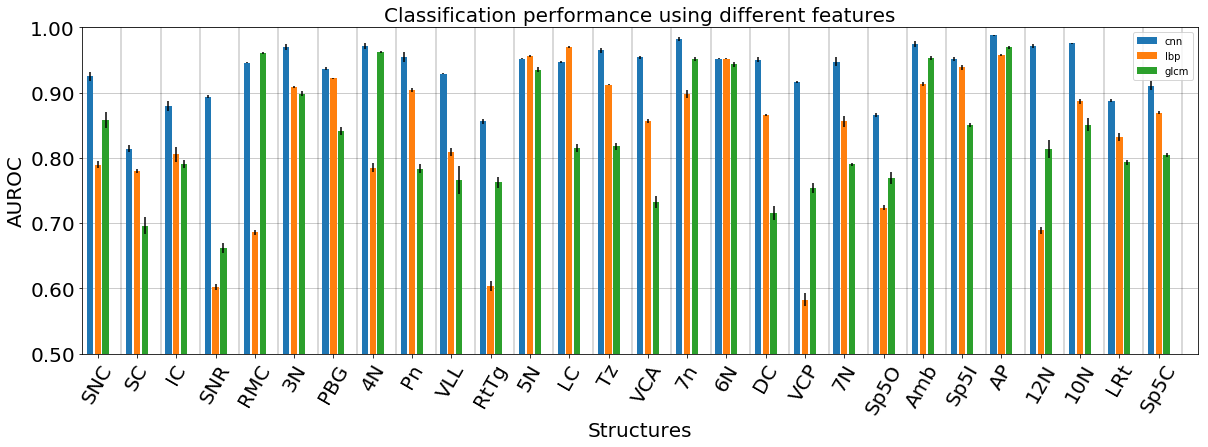

In [169]:
plot_by_method_by_structure(auroc_all_methods_all_structures,
                           structures=structures_unsided_sorted_by_rostral_caudal_position,
                            stacks=['cnn', 'lbp', 'glcm'],
                              style='boxplot', 
                               ylim=[0.5, 1], yspacing=0.1,
                              title='Classification performance using different features',
                              ylabel='AUROC',
                          stack_to_color={'cnn':(255,0,0), 'lbp':(0,0,255), 'glcm':(0,255,0)},
                           spacing_btw_stacks=2)

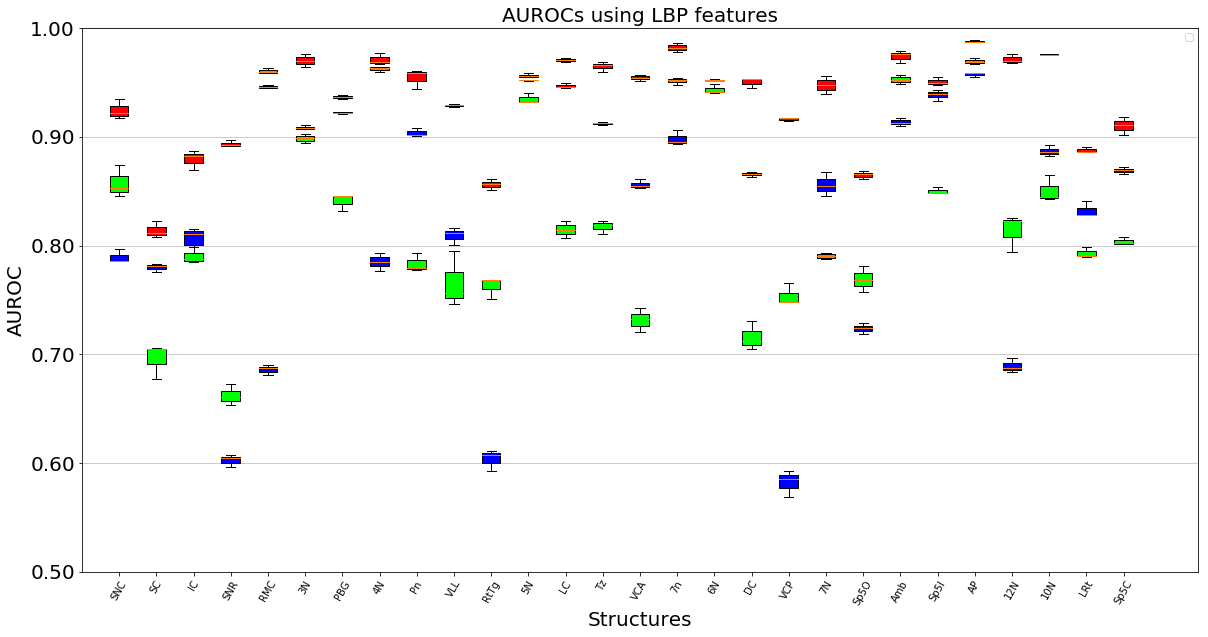

In [90]:
plot_by_stack_by_structure(auroc_all_methods_all_structures,
                           structures=structures_unsided_sorted_by_rostral_caudal_position,
                              style='boxplot', 
                               ylim=[0.5, 1], yspacing=0.1,
                              title='AUROCs using LBP features',
                              ylabel='AUROC',
                          stack_to_color={'cnn':(255,0,0), 'lbp':(0,0,255), 'glcm':(0,255,0)},
                          figsize=(20,10))

In [4]:
for fn in os.listdir(os.path.join(ROOT_DIR + '/assessment_results_v2')):
#     print fn
    fp = os.path.join(ROOT_DIR + '/assessment_results_v2', fn)
    res = load_pickle(fp)
    
    if res['train_stack'] == 'MD589':
#     if res['train_stack'] == 'MD589' and res['test_stack'] == 'MD594':
#     if res['train_stack'] in all_nissl_stacks and \
#     (res['test_stack'] in all_alt_nissl_ntb_stacks):
#     if res['test_stack'] == 'ChatCryoJane201710':
#     if res['test_stack'] == 'MD661':
    
        print 'train: %s, %s sections, %s, %s' % (res['train_stack'], res['n_train_sections'], res['train_scheme'], res['train_stain'] if 'train_stain' in res else '')
        print 'test: %s, %s sections, %s, %s' % (res['test_stack'], res['n_test_sections'], res['test_scheme'], res['test_stain'] if 'test_stain' in res else '')

    #         plot_result_wrt_ntrain(extract_one_metric(res['test_metrics_all_ntrain'], 'auroc'), ylabel='Area under ROC')
    #     plot_result_wrt_ntrain(extract_one_metric(res['test_metrics_all_ntrain'], 'acc', 0.5), ylabel='Test accuracy @ 0.5 threshold')

    #     plot_roc_curve(res['test_metrics_all_ntrain'][1000][('normalize_mu_region_sigma_wholeImage_(-1,5)',
    #               'augment')][0]['fp'], 
    #                res['test_metrics_all_ntrain'][1000][('normalize_mu_region_sigma_wholeImage_(-1,5)',
    #               'augment')][0]['tp'], 
    #               res['test_metrics_all_ntrain'][1000][('normalize_mu_region_sigma_wholeImage_(-1,5)',
    #               'augment')][0]['opt_thresh']);
 
        for test_scheme in res['test_metrics_all_ntrain'][1000].keys():
#             print test_scheme, res['test_metrics_all_ntrain'][1000][test_scheme][0]['acc'][0.5]
            print test_scheme, 'auroc =',res['test_metrics_all_ntrain'][1000][test_scheme][0]['auroc']
        print

train: MD589, {'MD589': 10} sections, normalize_mu_region_sigma_wholeImage_(-1,5), {'MD589': 'A'}
test: MD661, {'MD661': 10} sections, normalize_mu_region_sigma_wholeImage_(-1,5), {'MD661': 'A'}
('normalize_mu_region_sigma_wholeImage_(-1,5)', 'no-augment') auroc = 0.6911214999999999
('normalize_mu_region_sigma_wholeImage_(-1,5)', 'augment') auroc = 0.6208809999999999

train: MD589, {'MD589': 10} sections, none, {'MD589': 'A'}
test: MD642, {'MD642': 10} sections, none, {'MD642': 'N'}
('none', 'no-augment') auroc = 0.8334915000000002
('none', 'augment') auroc = 0.7142865

train: MD589, 10 sections, normalize_mu_region_sigma_wholeImage_(-1,5), 
test: ChatCryoJane201710, 10 sections, normalize_mu_region_sigma_wholeImage_(-1,5), 
('normalize_mu_region_sigma_wholeImage_(-1,5)', 'no-augment') auroc = 0.577557
('normalize_mu_region_sigma_wholeImage_(-1,5)', 'augment') auroc = 0.6410799999999998

train: MD589, 10 sections, normalize_mu_region_sigma_wholeImage_(-1,5), 
test: MD594, 10 sections, 

In [ ]:
for fn in os.listdir(os.path.join(ROOT_DIR + '/assessment_results')):
    fp = os.path.join(ROOT_DIR + '/assessment_results', fn)
    res = load_pickle(fp)
    
    if res['train_stack'] == 'MD589' and res['test_stack'] == 'MD661':
#     if res['train_stack'] == 'MD661' and res['test_stack'] == 'ChatCryoJane201710':
    
        print 'train: %s, %d sections, %s' % (res['train_stack'], res['n_train_sections'], res['train_scheme'])
        print 'test: %s, %d sections, %s' % (res['test_stack'], res['n_test_sections'], res['test_scheme'])
        if 'test_auroc_all_ntrain' in res:
            plot_result_wrt_ntrain(res['test_auroc_all_ntrain'], ylabel='Area under ROC')
        if 'test_accs05_all_ntrain' in res:
            plot_result_wrt_ntrain(res['test_accs05_all_ntrain'], ylabel='Test accuracy')